In [1]:
import mglearn
import pandas as pd
import numpy as np

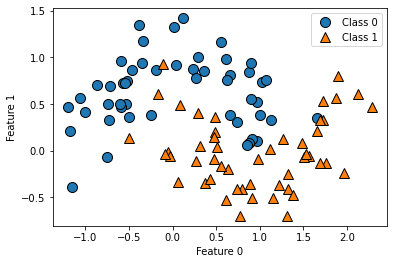

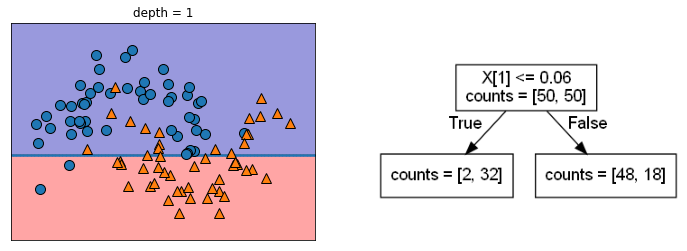

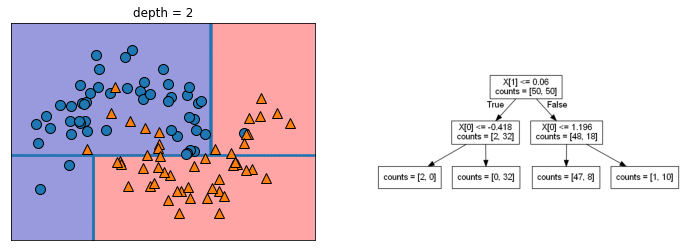

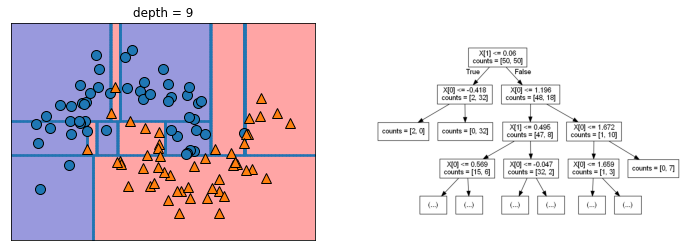

In [2]:
mglearn.plots.plot_tree_progressive()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import graphviz

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

In [5]:
model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 6 , random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=0)

In [6]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.971830985915493, 0.958041958041958)

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

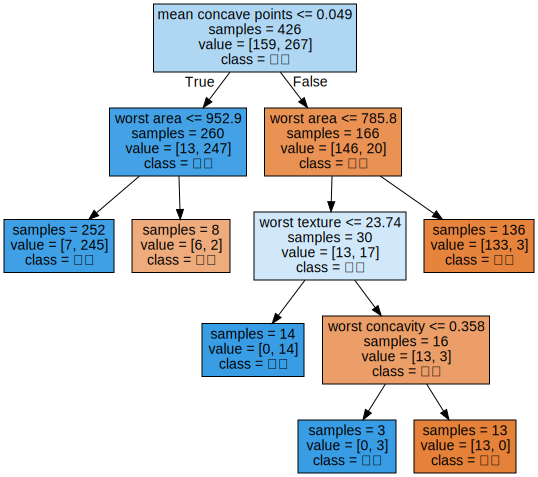

In [10]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [11]:
model.feature_importances_
# feature 간의 상대 중요도
# max_depth 와 max_leaf_nodes 에 영향을 받음
# 중요한 feature를 알수 있음 0값은 사용되지 않은 feature 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.78848763, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05575   , 0.        , 0.12819369, 0.        ,
       0.        , 0.02756868, 0.        , 0.        , 0.        ])

In [12]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

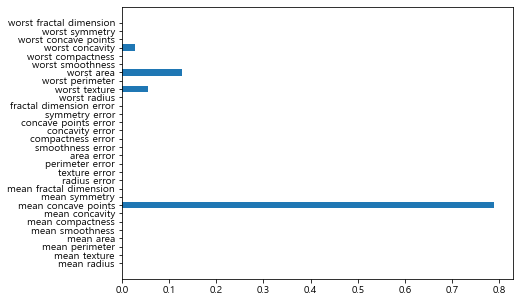

In [13]:
plt.figure(figsize=(7,5))
plt.barh(cancer["feature_names"],model.feature_importances_)
plt.show()

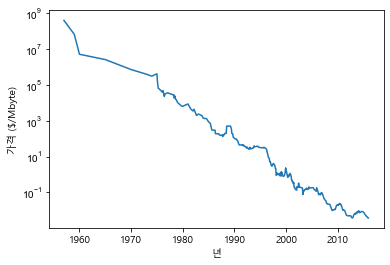

In [14]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [16]:
train = ram_prices[ram_prices["date"] < 2000]
test = ram_prices[ram_prices["date"] >= 2000]

In [17]:
X_train = train.date.to_numpy()[:, np.newaxis]
y_train = train["price"].apply(lambda x : np.log(x))

X_test = test.date.to_numpy()[:, np.newaxis]
y_test = test["price"].apply(lambda x : np.log(x))

In [18]:
tree_model = DecisionTreeRegressor()
linear_model = LinearRegression()

tree_model.fit(X_train,y_train)
linear_model.fit(X_train,y_train)

LinearRegression()

In [19]:
X = ram_prices["date"].to_numpy()[:, np.newaxis]
y = ram_prices["price"].apply(lambda x : np.log(x))

In [20]:
pred_tree = tree_model.predict(X)
pred_linear = linear_model.predict(X)

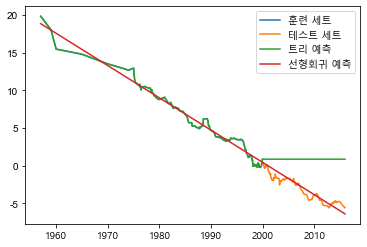

In [21]:
plt.yticks(fontname = "Arial") 
plt.plot(X_train, y_train, label = "훈련 세트")
plt.plot(X_test, y_test, label = "테스트 세트")
plt.plot(X, pred_tree, label="트리 예측")
plt.plot(X, pred_linear, label = "선형회귀 예측")
plt.legend()
plt.show()

In [22]:
df = pd.read_csv("mushrooms.csv")

In [23]:
df.info()
df.describe()
#df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [24]:
df = pd.read_csv("mushrooms.csv")

In [25]:
# def ValueChange(x,Value,NewValue):
#     for ValueInput,NewValueInput in zip(Value,NewValue):
#         if x == ValueInput:
#             return NewValueInput
#         else:
#             pass

# for i in df.columns:
#     dfValue = df[i].unique()
#     dfNewValue = range(len(df[i].unique()))

#     df[i] = df[i].apply(lambda x : ValueChange(x,dfValue,dfNewValue))

def encode(series):
    dic = dict(zip(series.unique(),range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result
for i in df.columns:
    df[i] = encode(df[i])

In [26]:
df.corrwith(df["class"]).sort_values()

odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
stalk-root                 -0.337542
stalk-color-above-ring     -0.225294
habitat                    -0.191297
population                 -0.155254
cap-shape                  -0.112110
stalk-color-below-ring     -0.098476
cap-color                  -0.042028
stalk-shape                 0.102019
veil-color                  0.120766
gill-attachment             0.129200
ring-number                 0.152261
cap-surface                 0.169663
gill-spacing                0.348387
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
dtype: float64

In [27]:
y = df["class"]
X = df
del X["veil-type"]
del X["odor"]
del X["class"]
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6093, 20), (2031, 20), (6093,), (2031,))

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [31]:
# from sklearn.tree import export_graphviz

export_graphviz(model, out_file='mushroom_tree.dot',
                class_names = ['독','식용'],
                feature_names = X.columns,
                impurity = True,
                filled = True)

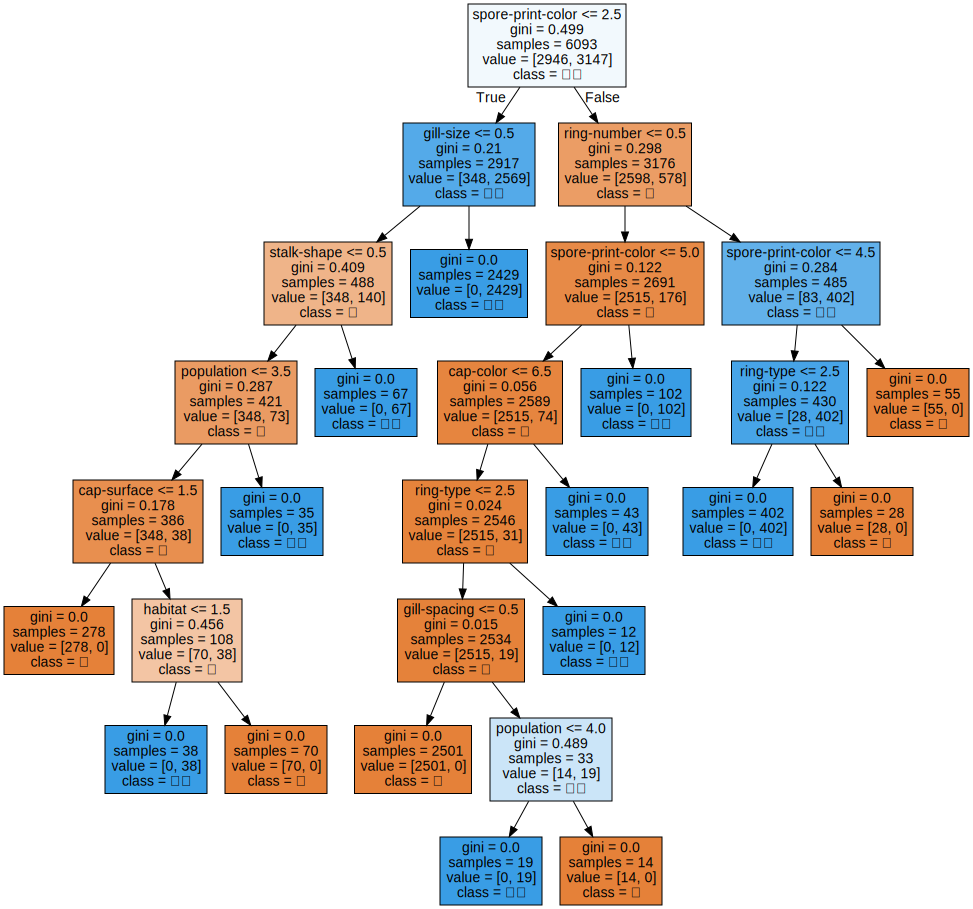

In [32]:
# import graphviz

with open('mushroom_tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

<BarContainer object of 20 artists>

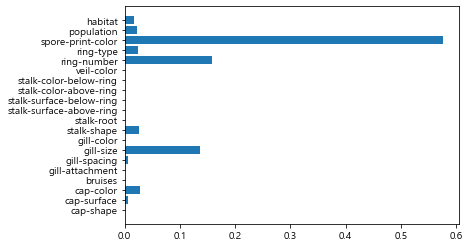

In [33]:
xlabel = X.columns
plt.barh(X.columns, model.feature_importances_)